# Рабочая тетрадь №4

## Теоретический материал

### Линейные регрессионные модели
Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.
<br>Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть <i>f (x) = b + m ⋅ x +</i>, где <i>m</i> – наклон линии, а <i>b</i> – его сдвиг.

<p><b>Функция потерь — метод наименьших квадратов</b>
<br>Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением <i>y</i>(х) и его фактическим значением.
<p>Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.
<p><b>Задача экраполяции</b>
<br>Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
<br>Для решения данной задачи в Python есть множество библиотек. Самыми распостраненными выступают:

<p><b>numpy - numpy.linalg.lstsq</b>
<br><b>scipy - scipy.linalg</b> (содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).

## Пример 1.1.1

Задание:
<br>Проведем прямую <i>y = mx + b</i> через экспериментальные точки.

In [4]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

#Перепишем линейное урабнение у = mx + с как у = Xp, где A = [[ × 1 ]] и p = [[m], [с]]
#Построим А по х :

A = np.vstack([x, np. ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [5]:
#Используем метод istsq для решения его относительно вектора р.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999997 -0.949999999999999


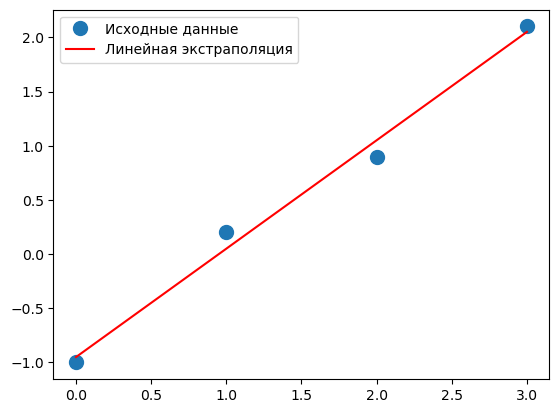

In [6]:
#Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

## Пример 1.1.2

Задание:
<br>Пусть <i>x, y</i> – вектора длиной <i>n > 3</i> (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты поринома <i>a, b, c</i> по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

[-4.83374056 -3.89705147 -3.42752356 -2.43896166 -1.19291777 -0.44201974
  0.67801196  1.67092324  3.14067509  4.44762227  4.72567386]
[24.79857754 16.29638145  8.65354762  3.63385534  1.36350519 -0.2221146
  0.77466329  3.76367949  8.78575248 16.20513451 24.55220109]


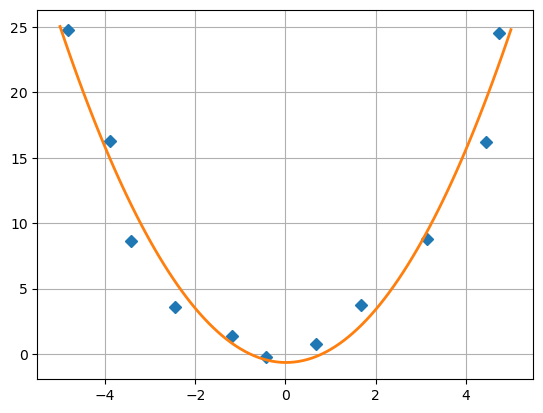

In [4]:
from numpy import *
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
#генерируем случайные х и у
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)

x += delta*(rand(11)-0.5)
#записывае данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')
# читаем данные из файлов

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

# Нахождение коэффициентов функции вида у = ax 2 + bx + с методом наименьших квадратов
# задаем вектор т = [x**2, x, E]
m = vstack((x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], "-", lw=2)
plt.grid()
plt.savefig('парабола.png')

## Пример 1.1.3

Задание:
<br>По данным предыдущего примера постройте эстраполяционного полинома третьего порядка.

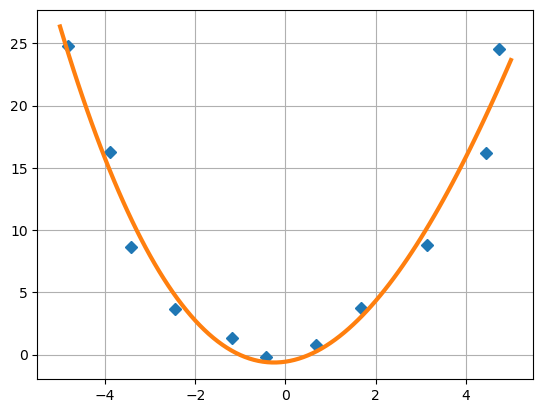

In [7]:
#Решение
# Нахождение коэффициентов функции вида у = ax*3 + bx*2 + сх + d методом наименьших квадратов
# задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у = ax*3 + bx*2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

## Задание

Задание:
<br>Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

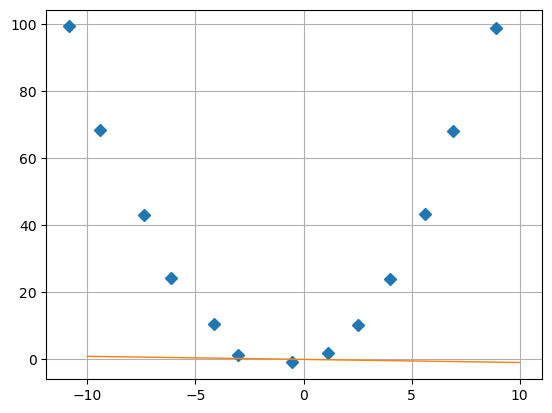

In [8]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np

delta = 1.0
x = linspace(-10,10,13)
y = x**2+delta*(rand(13)-1.5)
x+=delta*(rand(13)-1.5)

m = vstack((x,ones(13))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = linspace(-10,10,149)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0]*x_prec,'-',lw=1)
plt.grid()

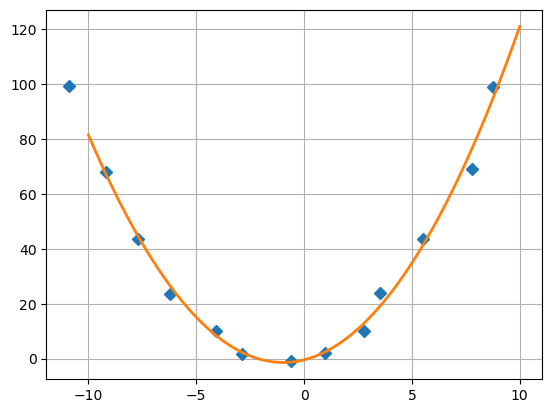

In [9]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np

delta = 1.0
x = linspace(-10,10,13)
y = x**2+delta*(rand(13)-1.5)
x+=delta*(rand(13)-1.5)

m = vstack((x**2, x,ones(13))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = linspace(-10,10,149)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0] * x_prec**2 + s[1]*x_prec + s[2],'-',lw=2)
plt.grid()

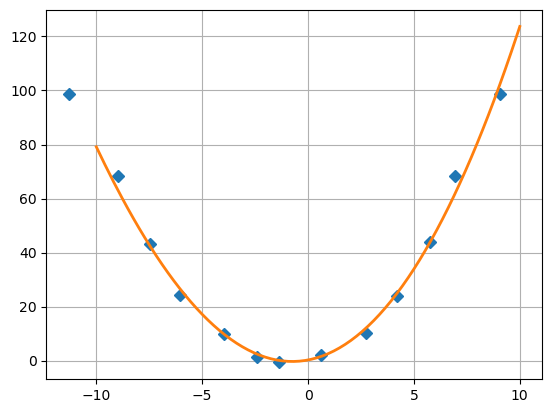

In [10]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np

delta = 1.0
x = linspace(-10,10,13)
y = x**2+delta*(rand(13)-1.5)
x+=delta*(rand(13)-1.5)

m = vstack((x**3,x**2, x,ones(13))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = linspace(-10,10,149)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'-',lw=2)
plt.grid()

## Пример 1.1.4

Задание:
<br>Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида: $$ f(x, b) = b_0 + b_1exp(−b_2x^2). $$

In [12]:
import scipy as sp

#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata u ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

0.0003250477583666711


In [14]:
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

0.1643777260308848


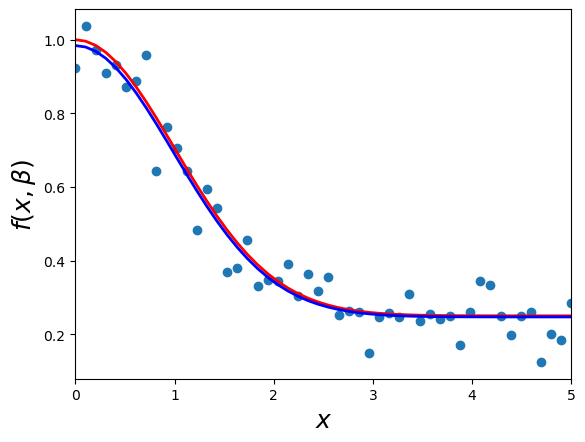

In [16]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [13]:
print(xdata)
print(ydata)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.92405733 1.03745743 0.97198393 0.91068262 0.93197713 0.87230647
 0.88853729 0.95901205 0.64296121 0.76372121 0.70671048 0.64325795
 0.48193958 0.59355842 0.54271784 0.36876067 0.37996287 0.45551569
 0.33228562 0.34786393 0.34563414 0.39049378 0.30502618 0.3649382
 0.31777972 0.35538564 0.25248134 0.26379727 0.25963299 0.15013497
 0.24767701 0.25764876 0.24781257 0.30949465 0.23703323 0.25481878
 0.24208406 0.25054143 0.17071162 0.260

## Пример 1.1.5

Задание:
<br>Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:

1. $$ f(x, b) = b_0 + b_1x $$
2. $$ f(x, b) = b_0 + b_1x + b_2x^2 $$
3. $$ f(x, b) = b_0 + b_1ln(x) $$
4. $$ f(x, b) = b_0 x^{b_1} $$

[0.23896733 0.74971294]
0.00012143352407069326
0.10677775303708871


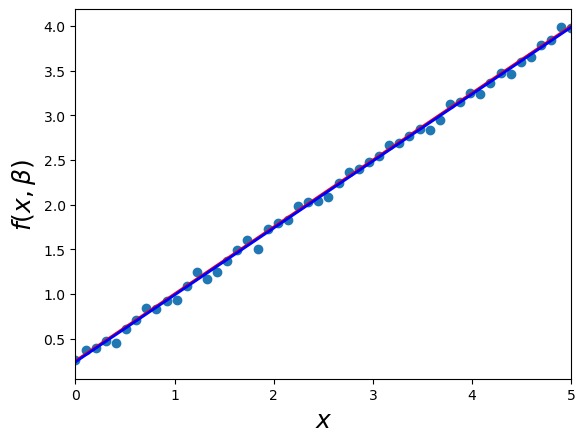

[0.25443224 0.7211853  0.50635396]
0.00019047138814428134
0.15883320104826298


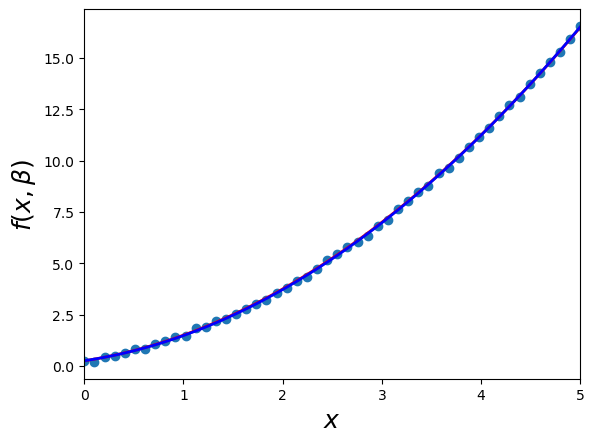

[0.98472222 2.01750976]
5.986266350984108e-05
0.1384289034847517


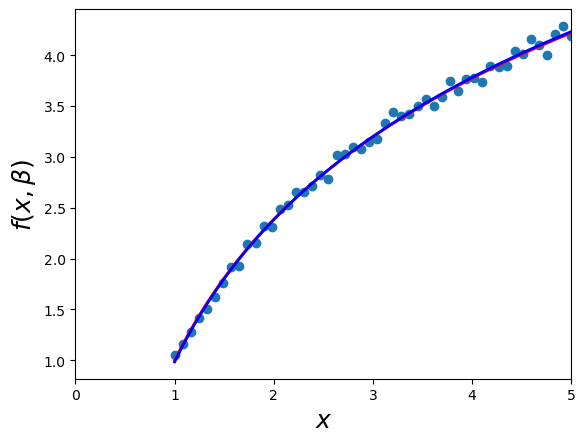

[1.00027936 1.99992147]
1.0209954539593296e-06
0.09684292876976769


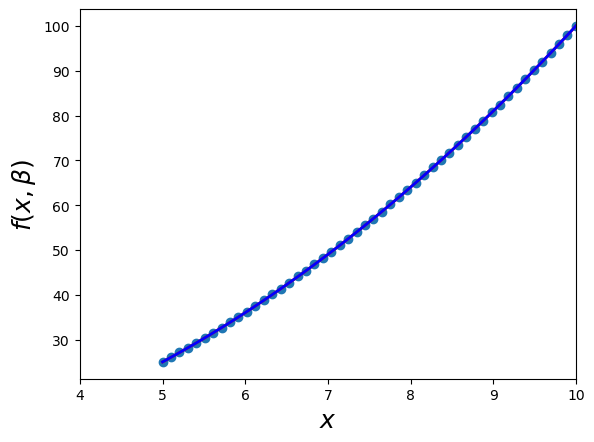

In [18]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

beta = (0.25, 0.75)


def f(x, b0, b1):
    return b0 + x * b1


xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()
#2
beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + x * b1 + x * x * b2


xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()
#3
beta = (1, 2)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()
#4
beta = (1, 2)


def f(x, b0, b1):
    return b0 * x ** b1


xdata = np.linspace(5, 10, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(4, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()

## Задание

Задание:
<br>Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

## Теоретический материал

### Линейные регрессионные модели
<b>Линейная регрессия</b> - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имееи дело с множественной линейной регрессией.
<p>В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.

## Пример 1.2.1

Задание:
<br>Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn.

In [20]:
#Импортируем необходимые библиотеки
#используем pandas и питру для обработки данных,
#matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей. import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#создадим набор данных для описания взаимосбязи между временем обучения студентов и успебаемостью
my_dict = {"Учебное время": [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,
5.e0,5.50],
        "Оценка": [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [22]:
#Исследуем набор данных
print(dataset.shape)
dataset. describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


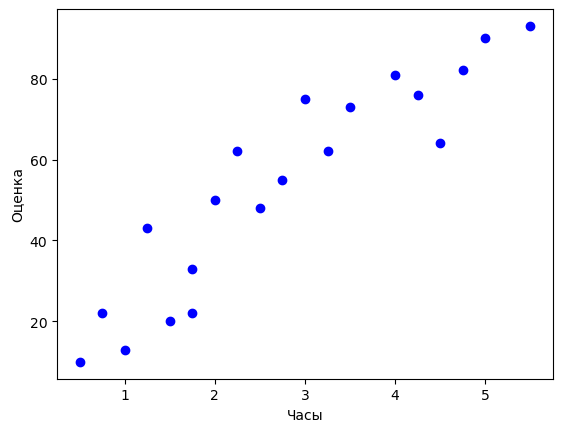

In [23]:
# Нарисуем точечную диаграмму
plt.scatter (dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

In [26]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [27]:
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набар тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
#приведем получившиеся коэффициенты для линии регрессии print(regressor.intercept
print(regressor.intercept_)
print(regressor.coef_)

5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

In [30]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


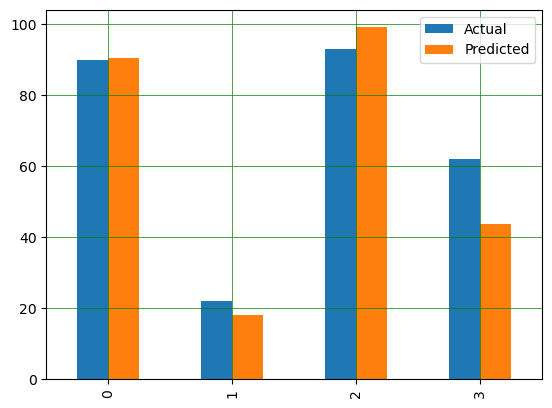

In [31]:
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

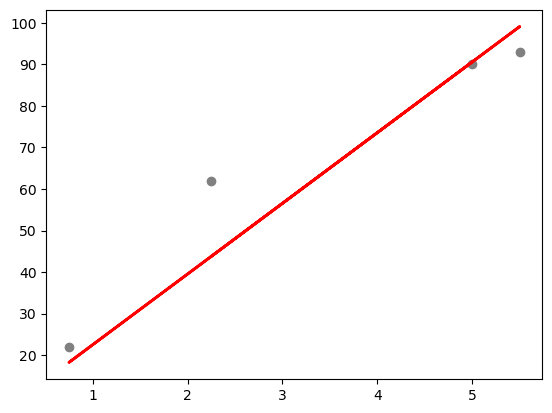

In [32]:
#построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

## Задание

Задание:
<br>Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
<br>(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).
<br>Найдите коэффициенты линии регрессии. Постройте прогноз.

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


## Теоретический материал

### Линейные регрессионные модели
В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой. Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.

## Пример 1.3.1

Задание:
<br>Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.

In [34]:
import numpy as np
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X) # transpose so input vectors
X = np.c_[X, np.ones(X.shape[0])] # add bias term
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn. Рассмотрим пример.

## Пример 1.3.2

Задание:
<br>Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из дбух спискоб
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd. DataFrame(new_y)
new_X = np. array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [36]:
# изучим данные
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [52]:
# разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']
# разделим данные на обучашую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fin() класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.224734
x2,0.364703
x3,-0.183665


In [54]:
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
20,1,2.677307
17,0,5.005493
3,4,1.915711
13,5,5.496030
19,3,3.409341


In [56]:
#Последний - сценить произбодительность алгоритма, Мы сделаем это, майдл значения для MSE
print("Mean Squared Errors", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Errors 6.525236734729814


## Задание

Задание:
<br>Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


url='https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
dataframe=pd.read_csv(url)
dataframe.head()
print(dataframe.shape)
dataframe.describe()

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


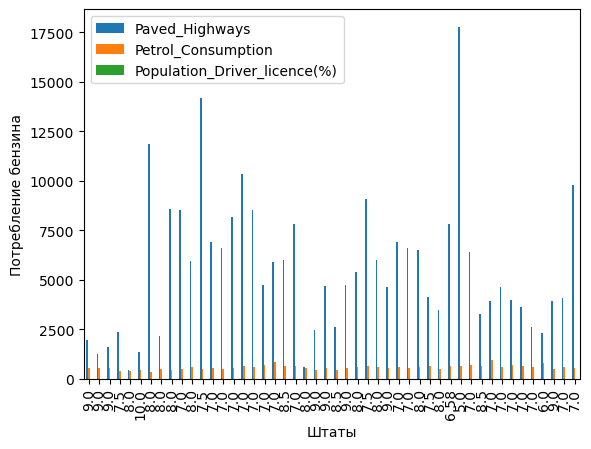

In [58]:
dataframe.plot(x="Petrol_tax",y=['Paved_Highways','Petrol_Consumption','Population_Driver_licence(%)'],kind="bar")
plt.xlabel("Штаты")
plt.ylabel("Потребление бензина")
plt.show()

In [59]:
X=dataframe[['Average_income','Population_Driver_licence(%)','Petrol_Consumption']]
y=dataframe['Petrol_tax']
print(X)
print(y)

    Average_income  Population_Driver_licence(%)  Petrol_Consumption
0             3571                         0.525                 541
1             4092                         0.572                 524
2             3865                         0.580                 561
3             4870                         0.529                 414
4             4399                         0.544                 410
5             5342                         0.571                 457
6             5319                         0.451                 344
7             5126                         0.553                 467
8             4447                         0.529                 464
9             4512                         0.552                 498
10            4391                         0.530                 580
11            5126                         0.525                 471
12            4817                         0.574                 525
13            4207                

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(X_train,y_train)
coef_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Коэффициент'])
coef_df

,Коэффициент
Average_income,-0.000282
Population_Driver_licence(%),4.513605
Petrol_Consumption,-0.005763


In [62]:
y_pred=regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
29,9.0,7.745885
4,8.0,8.466001
26,8.0,7.789398
30,7.0,7.634500
32,8.0,8.033229
37,7.0,7.102528
34,8.0,8.010238
40,7.0,7.801928
7,8.0,7.973379
10,8.0,7.425299


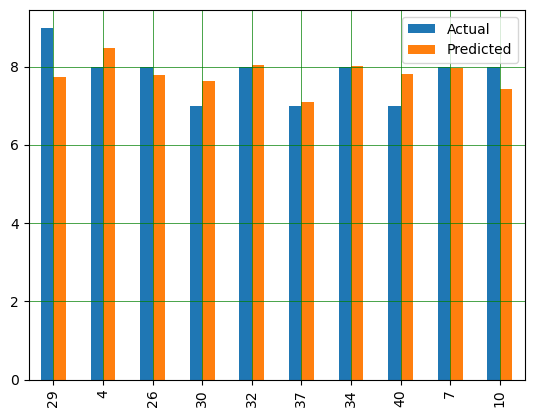

In [63]:
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [64]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 0.3222702495042146


## Задание*

Задание:
<br>Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты  выводятся в виде таблиц значений и графиков, полученных полиномов.

In [67]:
import numpy as np

x = [4.0, 4.2, 4.4, 4.6, 4.8, 5.0]
y = [4.0, 3.0, 6.0, 6.0, 4.0, 4.0]
new_y = np.array(y)
new_x = np.array(x)
A = np.vstack([new_x, np.ones(len(new_x))]).T
A
m, c = np.linalg.lstsq(A, new_y, rcond=None)[0]
print(m, c)

0.42857142857142716 2.571428571428575


In [68]:
new_y = np.array(y)
new_x = np.array(x)
A = np.vstack([new_x, np.ones(len(new_x))]).T
A

array([[4. , 1. ],
       [4.2, 1. ],
       [4.4, 1. ],
       [4.6, 1. ],
       [4.8, 1. ],
       [5. , 1. ]])

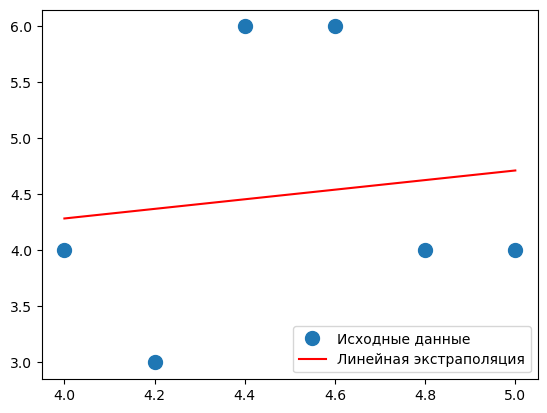

In [69]:
import matplotlib.pyplot as plt

plt.plot(new_x, new_y, 'o', label='Исходные данные', markersize=10)
plt.plot(new_x, m * new_x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

In [70]:
from numpy import *
from numpy.random import *

print(new_x)
print(new_y)

[4.  4.2 4.4 4.6 4.8 5. ]
[4. 3. 6. 6. 4. 4.]


-0.0023516 0.19277 -0.68789


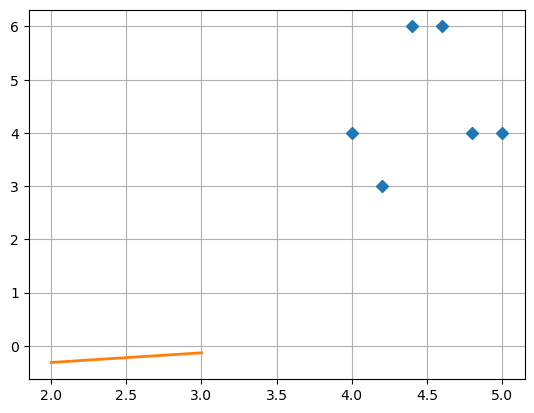

In [72]:
m = vstack((new_x ** 2, new_x, ones(6))).T
s = np.linalg.lstsq(m, new_y, rcond=None)[0]
s = [-0.0023516, 0.19277, -0.68789]
x_prec = linspace(2, 3, 11)
plt.plot(new_x, new_y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
print(s[0], s[1], s[2])